In [1]:
#  Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters 
# using the elbow method. Dataset Link: https://www.kaggle.com/datasets/uciml/iris 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
iris_data = pd.read_csv('iris.csv')


In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 2. Preprocess the data (features only)
X = iris_data.iloc[:, :-1].values  # Exclude the Species column


In [6]:
# Optionally, scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 3. Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

In [8]:
# Calculate WCSS for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS


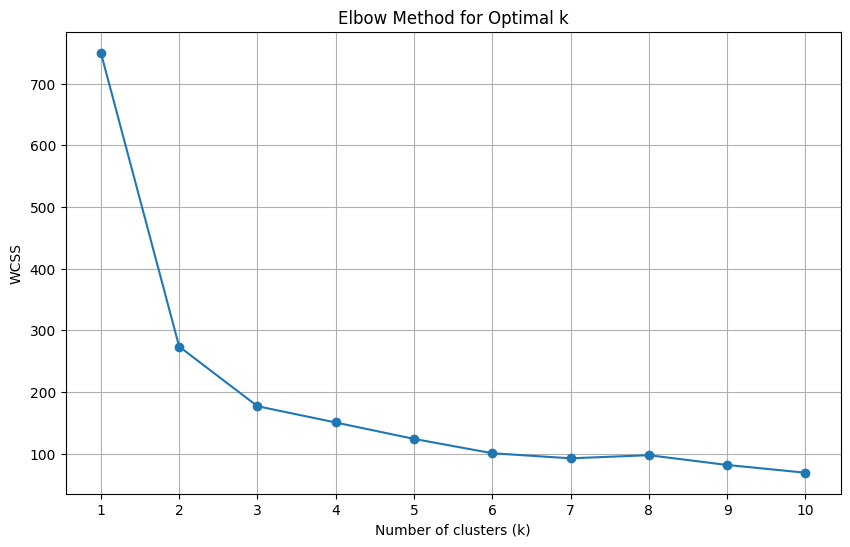

In [9]:
# 4. Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [10]:
# 5. Fit K-Means with the optimal number of clusters (assuming k=3 based on the elbow plot)
optimal_k = 3  # Set this based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

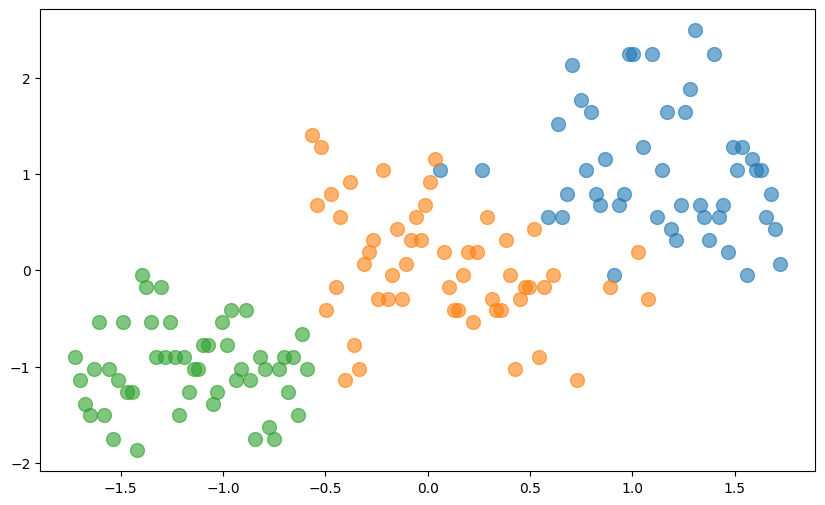

In [11]:
# 6. Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, label='Cluster 1', alpha=0.6)
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, label='Cluster 2', alpha=0.6)
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, label='Cluster 3', alpha=0.6)


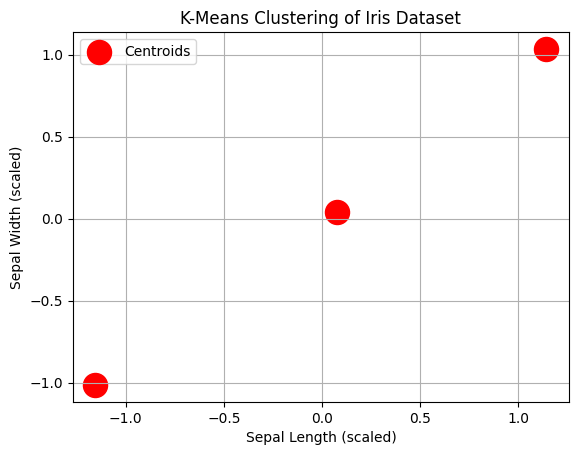

In [12]:
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.grid()
plt.show()